# Anime Data exploration

using jikan API that scrapes data from MyAnimeList
https://docs.api.jikan.moe/

## Trial Run

First I fetch the raw data from the api

In [36]:
import requests

url = 'https://api.jikan.moe/v4/anime/'
response = requests.get(url)

Next I convert it to json

In [37]:
import json

json_data = json.loads(response.text)
json_data

{'pagination': {'last_visible_page': 1134,
  'has_next_page': True,
  'current_page': 1,
  'items': {'count': 25, 'total': 28348, 'per_page': 25}},
 'data': [{'mal_id': 1,
   'url': 'https://myanimelist.net/anime/1/Cowboy_Bebop',
   'images': {'jpg': {'image_url': 'https://cdn.myanimelist.net/images/anime/4/19644.jpg',
     'small_image_url': 'https://cdn.myanimelist.net/images/anime/4/19644t.jpg',
     'large_image_url': 'https://cdn.myanimelist.net/images/anime/4/19644l.jpg'},
    'webp': {'image_url': 'https://cdn.myanimelist.net/images/anime/4/19644.webp',
     'small_image_url': 'https://cdn.myanimelist.net/images/anime/4/19644t.webp',
     'large_image_url': 'https://cdn.myanimelist.net/images/anime/4/19644l.webp'}},
   'trailer': {'youtube_id': 'gY5nDXOtv_o',
    'url': 'https://www.youtube.com/watch?v=gY5nDXOtv_o',
    'embed_url': 'https://www.youtube.com/embed/gY5nDXOtv_o?enablejsapi=1&wmode=opaque&autoplay=1',
    'images': {'image_url': 'https://img.youtube.com/vi/gY5nDXOtv

Wow, that's a lot of data. Let's first analyze what we need.

We will have to do an api call to all 1134 pages, with 25 data points each. To get a specific page number, we append "?page=2" to the end of the request.

Now I need all these things from the raw json data...

- mal_id: just a unique id
- title: name of the show
- duration: how long is each episode
- score: it's average score
- scored_by: how many people scored it
- year: year released
- studios: studio made by
- genres: what genre it is
- episodes: how many episodes
- members: how many people added it to their list (popularity)
- rating: how old you are recommended to be to watch
- themes
- demographics

In [38]:
raw_anime_data = json_data["data"]

def trim(anime):
    keys_to_keep = ["mal_id", "title", "year", "score", "scored_by", "rating", "duration", "members", "episodes"]
    trimmed = {key: anime[key] for key in keys_to_keep}
    trimmed["studios"] = [element["name"] for element in anime["studios"]]
    trimmed["themes"] = [element["name"] for element in anime["themes"]]
    trimmed["genres"] = [element["name"] for element in anime["genres"]]
    trimmed["demographics"] = [element["name"] for element in anime["demographics"]]
    return trimmed

trimmed_data = list(map(trim, raw_anime_data))

import pandas as pd

pd.set_option('display.max_columns', None)

anime_data = pd.DataFrame(trimmed_data)
anime_data.head()



,mal_id,title,year,score,scored_by,rating,duration,members,episodes,studios,themes,genres,demographics
0,1,Cowboy Bebop,1998.0,8.75,1008605,R - 17+ (violence & profanity),24 min per ep,1951997,26.0,[Sunrise],"[Adult Cast, Space]","[Action, Award Winning, Sci-Fi]",[]
1,5,Cowboy Bebop: Tengoku no Tobira,NaN,8.38,223452,R - 17+ (violence & profanity),1 hr 55 min,393960,1.0,[Bones],"[Adult Cast, Space]","[Action, Sci-Fi]",[]
2,6,Trigun,1998.0,8.22,386030,PG-13 - Teens 13 or older,24 min per ep,795600,26.0,[Madhouse],[Adult Cast],"[Action, Adventure, Sci-Fi]",[Shounen]
3,7,Witch Hunter Robin,2002.0,7.24,45117,PG-13 - Teens 13 or older,25 min per ep,122044,26.0,[Sunrise],[Detective],"[Action, Drama, Mystery, Supernatural]",[]
4,8,Bouken Ou Beet,2004.0,6.92,6938,PG - Children,23 min per ep,16185,52.0,[Toei Animation],[],"[Action, Adventure, Fantasy]",[Shounen]


## Getting data

Ok now we can retrieve all the data and organize it...

In [169]:
def trim_anime(anime):
    keys_to_keep = ["mal_id", "title", "year", "score", "scored_by", "rating", "duration", "members", "episodes"]
    trimmed = {key: anime[key] for key in keys_to_keep}
    more_keys = ["studios", "themes", "genres", "demographics"]
    for key in more_keys:
        trimmed[key] = [element["name"] for element in anime[key]]
    return trimmed

In [ ]:
import requests
import pandas as pd
import time

pd.set_option('display.max_columns', None) # displays all columns

url = 'https://api.jikan.moe/v4/anime/'
anime_data = pd.DataFrame();
print(len(anime_data))

for i in range(0, 1134):
    response = requests.get(f"{url}?page={i+1}") # HTTP GET request to specified URL
    json_data = json.loads(response.text)
    raw_anime_data = json_data["data"]
    trimmed_data = list(map(trim_anime, raw_anime_data))
    new_data = pd.DataFrame(trimmed_data)
    anime_data = pd.concat([anime_data, new_data], ignore_index=True)
    time.sleep(2) # sleep for 2 seconds since you can only do 60 requests per minute to this API!
    print(len(anime_data))
anime_data

28348
25
50


,mal_id,title,year,score,scored_by,rating,duration,members,episodes,studios,themes,genres,demographics
0,1,Cowboy Bebop,1998.0,8.75,1008605.0,R - 17+ (violence & profanity),24 min per ep,1951997,26.0,[Sunrise],"[Adult Cast, Space]","[Action, Award Winning, Sci-Fi]",[]
1,5,Cowboy Bebop: Tengoku no Tobira,NaN,8.38,223452.0,R - 17+ (violence & profanity),1 hr 55 min,393960,1.0,[Bones],"[Adult Cast, Space]","[Action, Sci-Fi]",[]
2,6,Trigun,1998.0,8.22,386030.0,PG-13 - Teens 13 or older,24 min per ep,795600,26.0,[Madhouse],[Adult Cast],"[Action, Adventure, Sci-Fi]",[Shounen]
3,7,Witch Hunter Robin,2002.0,7.24,45117.0,PG-13 - Teens 13 or older,25 min per ep,122044,26.0,[Sunrise],[Detective],"[Action, Drama, Mystery, Supernatural]",[]
4,8,Bouken Ou Beet,2004.0,6.92,6938.0,PG - Children,23 min per ep,16185,52.0,[Toei Animation],[],"[Action, Adventure, Fantasy]",[Shounen]
...,...,...,...,...,...,...,...,...,...,...,...,...,...
28343,61274,Ginga Tokkyuu Milky☆Subway,2025.0,NaN,NaN,G - All Ages,Unknown,0,NaN,[],[Space],"[Comedy, Sci-Fi]",[]
28344,61276,Mikata ga Yowasugite Hojo Mahou ni Tesshiteita...,2025.0,NaN,NaN,None,Unknown,1,NaN,[Gekkou],[],"[Action, Adventure, Fantasy]",[]
28345,61278,Sumikko Gurashi Movie 4,NaN,NaN,NaN,G - All Ages,Unknown,0,1.0,[Fanworks],[],[Comedy],[]
28346,61280,Kore Kaite Shine,NaN,NaN,NaN,None,Unknown,1,NaN,[],[Otaku Culture],[Comedy],[]


In [43]:
anime_data.to_csv('raw_myAnimeList_data.csv', index=False)

In [ ]:
anime_data

,mal_id,title,year,score,scored_by,rating,duration,members,episodes,studios,themes,genres,demographics
0,1,Cowboy Bebop,1998.0,8.75,1008605.0,R - 17+ (violence & profanity),24 min per ep,1951997,26.0,[Sunrise],"[Adult Cast, Space]","[Action, Award Winning, Sci-Fi]",[]
1,5,Cowboy Bebop: Tengoku no Tobira,NaN,8.38,223452.0,R - 17+ (violence & profanity),1 hr 55 min,393960,1.0,[Bones],"[Adult Cast, Space]","[Action, Sci-Fi]",[]
2,6,Trigun,1998.0,8.22,386030.0,PG-13 - Teens 13 or older,24 min per ep,795600,26.0,[Madhouse],[Adult Cast],"[Action, Adventure, Sci-Fi]",[Shounen]
3,7,Witch Hunter Robin,2002.0,7.24,45117.0,PG-13 - Teens 13 or older,25 min per ep,122044,26.0,[Sunrise],[Detective],"[Action, Drama, Mystery, Supernatural]",[]
4,8,Bouken Ou Beet,2004.0,6.92,6938.0,PG - Children,23 min per ep,16185,52.0,[Toei Animation],[],"[Action, Adventure, Fantasy]",[Shounen]
...,...,...,...,...,...,...,...,...,...,...,...,...,...
28343,61274,Ginga Tokkyuu Milky☆Subway,2025.0,NaN,NaN,G - All Ages,Unknown,0,NaN,[],[Space],"[Comedy, Sci-Fi]",[]
28344,61276,Mikata ga Yowasugite Hojo Mahou ni Tesshiteita...,2025.0,NaN,NaN,None,Unknown,1,NaN,[Gekkou],[],"[Action, Adventure, Fantasy]",[]
28345,61278,Sumikko Gurashi Movie 4,NaN,NaN,NaN,G - All Ages,Unknown,0,1.0,[Fanworks],[],[Comedy],[]
28346,61280,Kore Kaite Shine,NaN,NaN,NaN,None,Unknown,1,NaN,[],[Otaku Culture],[Comedy],[]


In [45]:
anime_data.describe()

,mal_id,year,score,scored_by,members,episodes
count,28348.000000,6123.000000,18256.000000,1.825600e+04,2.834800e+04,27602.000000
mean,33324.210738,2009.688061,6.397329,2.993028e+04,3.815761e+04,14.218354
std,19345.455528,13.168723,0.891600,1.209475e+05,1.647362e+05,47.525475
min,1.000000,1961.000000,1.880000,1.010000e+02,0.000000e+00,1.000000
25%,14223.500000,2004.000000,5.780000,3.450000e+02,2.270000e+02,1.000000
50%,37462.500000,2013.000000,6.370000,1.579000e+03,1.068000e+03,2.000000
75%,49415.000000,2019.000000,7.030000,1.008575e+04,9.076000e+03,13.000000
max,61282.000000,2026.000000,9.310000,2.912573e+06,4.127720e+06,3057.000000


## Data processing/Visualization

### Which studio creates the highest-rated animes?

In [ ]:
hr_studio_raw_data = anime_data.explode('studios')[['score', 'scored_by', 'studios']]
hr_studio_raw_data

,score,scored_by,studios
0,8.75,1008605.0,Sunrise
1,8.38,223452.0,Bones
2,8.22,386030.0,Madhouse
3,7.24,45117.0,Sunrise
4,6.92,6938.0,Toei Animation
...,...,...,...
28343,NaN,NaN,NaN
28344,NaN,NaN,Gekkou
28345,NaN,NaN,Fanworks
28346,NaN,NaN,NaN


In [ ]:
hr_studio_data = hr_studio_raw_data.dropna()
hr_studio_data

,score,scored_by,studios
0,8.75,1008605.0,Sunrise
1,8.38,223452.0,Bones
2,8.22,386030.0,Madhouse
3,7.24,45117.0,Sunrise
4,6.92,6938.0,Toei Animation
...,...,...,...
27998,6.30,324.0,8bit
28009,6.37,401.0,Toei Animation
28132,7.55,537.0,CoMix Wave Films
28291,6.39,110.0,ufotable


In [ ]:
hr_studio_data["weight"] = hr_studio_data["score"] * hr_studio_data["scored_by"]
hr_studio_data

C:\Users\mural\AppData\Local\Temp\ipykernel_16700\2633877616.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hr_studio_data["weight"] = hr_studio_data["score"] * hr_studio_data["scored_by"]


,score,scored_by,studios,weight
0,8.75,1008605.0,Sunrise,8825293.75
1,8.38,223452.0,Bones,1872527.76
2,8.22,386030.0,Madhouse,3173166.60
3,7.24,45117.0,Sunrise,326647.08
4,6.92,6938.0,Toei Animation,48010.96
...,...,...,...,...
27998,6.30,324.0,8bit,2041.20
28009,6.37,401.0,Toei Animation,2554.37
28132,7.55,537.0,CoMix Wave Films,4054.35
28291,6.39,110.0,ufotable,702.90


In [ ]:
hr_studio_data = hr_studio_data.groupby('studios')[['scored_by', 'weight']].sum().reset_index()
hr_studio_data

,studios,scored_by,weight
0,100studio,16594.0,108840.28
1,10Gauge,7803.0,55074.51
2,2:10 Animation,5197.0,35888.91
3,3D Co.,136.0,754.80
4,5 Inc.,3865.0,23901.18
...,...,...,...
1066,team Yamahitsuji,151689.0,1089721.27
1067,teamKG,48011.0,292764.91
1068,ufotable,11700502.0,96388473.02
1069,uzupiyo Animation & Digital Works,1649.0,9992.94


In [ ]:
hr_studio_data["Average Score"] = hr_studio_data["weight"] / hr_studio_data["scored_by"]
hr_studio_data

,studios,scored_by,weight,Average Score
0,100studio,16594.0,108840.28,6.559014
1,10Gauge,7803.0,55074.51,7.058120
2,2:10 Animation,5197.0,35888.91,6.905698
3,3D Co.,136.0,754.80,5.550000
4,5 Inc.,3865.0,23901.18,6.184005
...,...,...,...,...
1066,team Yamahitsuji,151689.0,1089721.27,7.183918
1067,teamKG,48011.0,292764.91,6.097872
1068,ufotable,11700502.0,96388473.02,8.237978
1069,uzupiyo Animation & Digital Works,1649.0,9992.94,6.060000


In [ ]:
hr_studio_data = hr_studio_data.drop(["weight"], axis=1)
hr_studio_data["Average Score"] = hr_studio_data["Average Score"].round(3)
hr_studio_data

,studios,scored_by,Average Score
0,100studio,16594.0,6.559
1,10Gauge,7803.0,7.058
2,2:10 Animation,5197.0,6.906
3,3D Co.,136.0,5.550
4,5 Inc.,3865.0,6.184
...,...,...,...
1066,team Yamahitsuji,151689.0,7.184
1067,teamKG,48011.0,6.098
1068,ufotable,11700502.0,8.238
1069,uzupiyo Animation & Digital Works,1649.0,6.060


In [ ]:
hr_studio_data = hr_studio_data.rename(columns={"studios": "Studio", "scored_by":"Rating Count"})
hr_studio_data

,Studio,Rating Count,Average Score
0,100studio,16594.0,6.559
1,10Gauge,7803.0,7.058
2,2:10 Animation,5197.0,6.906
3,3D Co.,136.0,5.550
4,5 Inc.,3865.0,6.184
...,...,...,...
1066,team Yamahitsuji,151689.0,7.184
1067,teamKG,48011.0,6.098
1068,ufotable,11700502.0,8.238
1069,uzupiyo Animation & Digital Works,1649.0,6.060


In [ ]:
hr_studio_data = hr_studio_data.sort_values(by="Average Score", ascending=False)
hr_studio_data

,Studio,Rating Count,Average Score
390,K-Factory,99881.0,8.853
910,TOHO animation STUDIO,354484.0,8.802
613,Pierrot Films,106010.0,8.656
788,Studio DURIAN,85608.0,8.545
586,P.I.C.S.,244972.0,8.531
...,...,...,...
879,Studio! Cucuri,9988.0,3.372
299,General Entertainment,2216.0,3.310
134,Brio Animation,1378.0,3.000
995,Visual Flight,44488.0,2.880


In [117]:
hr_studio_data.to_csv("AnimeStudioRatings.csv", index=False)

In [122]:
hr_studio_data_trimmed = hr_studio_data[hr_studio_data["Rating Count"] > 5e6]
len(hr_studio_data_trimmed)

29

In [190]:
hr_studio_data = anime_data.explode('studios')[['score', 'scored_by', 'studios']]
hr_studio_data = hr_studio_data.dropna()
hr_studio_data["weight"] = hr_studio_data["score"] * hr_studio_data["scored_by"]
hr_studio_data = hr_studio_data.groupby('studios')[['scored_by', 'weight']].sum().reset_index()
hr_studio_data["Average Score"] = hr_studio_data["weight"] / hr_studio_data["scored_by"]
hr_studio_data["Average Score"] = hr_studio_data["Average Score"].round(3)
hr_studio_data = hr_studio_data.rename(columns={"studios": "Studio", "scored_by":"Rating Count"})
hr_studio_data = hr_studio_data.sort_values(by="Average Score", ascending=False)
hr_studio_data_trimmed = hr_studio_data[hr_studio_data["Rating Count"] > 5e6] # greater than 5 million

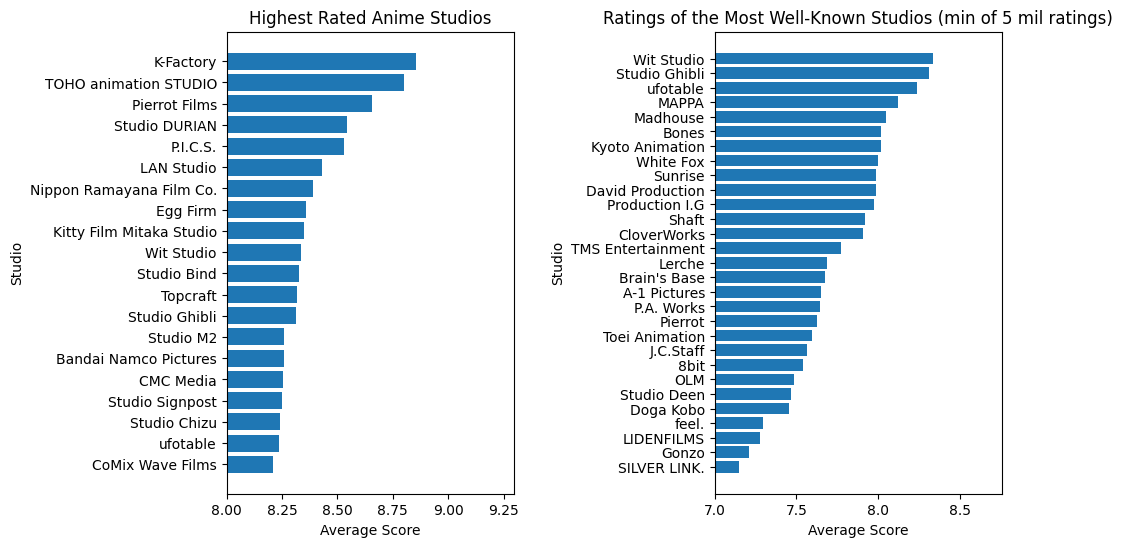

In [193]:
fig, axes = plt.subplots(1, 2, figsize=(10, 6))

axes[0].barh(hr_studio_data['Studio'][:20], hr_studio_data['Average Score'][:20])
axes[0].invert_yaxis()
axes[0].set_xlabel('Average Score')
axes[0].set_xlim(8)
axes[0].set_ylabel('Studio')
axes[0].set_title('Highest Rated Anime Studios')

axes[1].barh(hr_studio_data_trimmed['Studio'], hr_studio_data_trimmed['Average Score'])
axes[1].invert_yaxis()
axes[1].set_xlabel('Average Score')
axes[1].set_xlim(7)
axes[1].set_ylabel('Studio')
axes[1].set_title('Ratings of the Most Well-Known Studios (min of 5 mil ratings)')

plt.subplots_adjust(wspace=0.7)
plt.show()

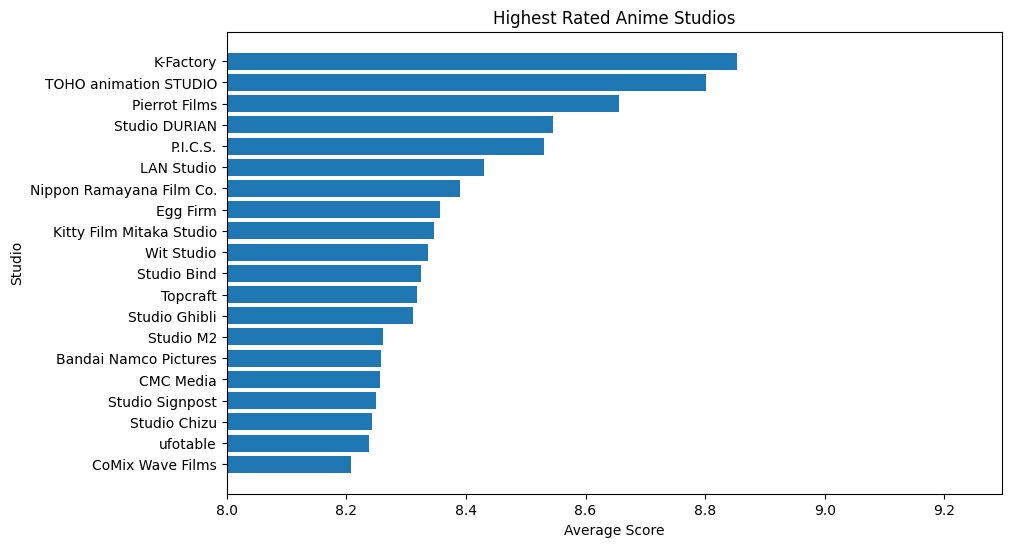

In [173]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.barh(hr_studio_data['Studio'][:20], hr_studio_data['Average Score'][:20])
plt.gca().invert_yaxis()
plt.xlim(8)
plt.ylabel('Studio')
plt.xlabel('Average Score')
plt.title('Highest Rated Anime Studios')
plt.show()


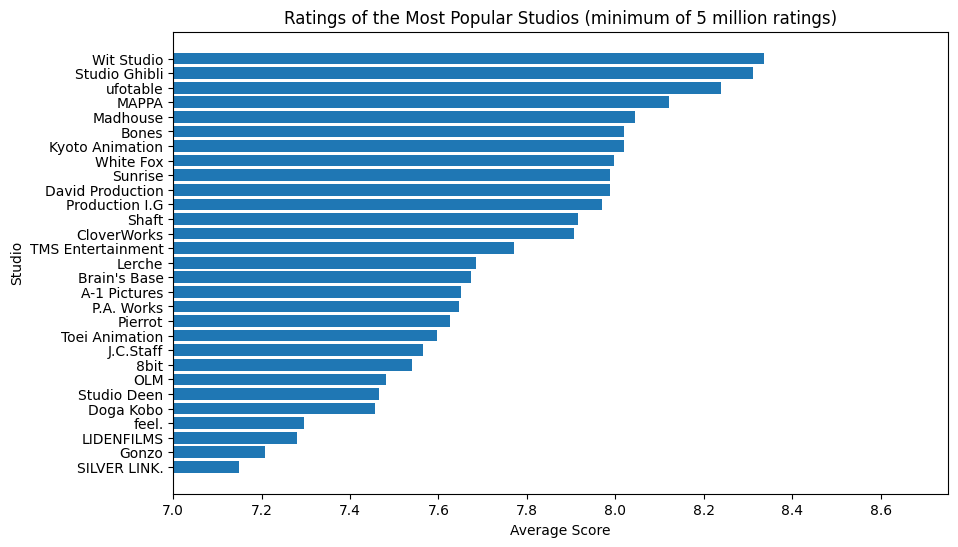

In [131]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.barh(hr_studio_data_trimmed['Studio'], hr_studio_data_trimmed['Average Score'])
plt.gca().invert_yaxis()
plt.xlim(7)
plt.ylabel('Studio')
plt.xlabel('Average Score')
plt.title('Ratings of the Most Popular Studios (minimum of 5 million ratings)')
plt.show()


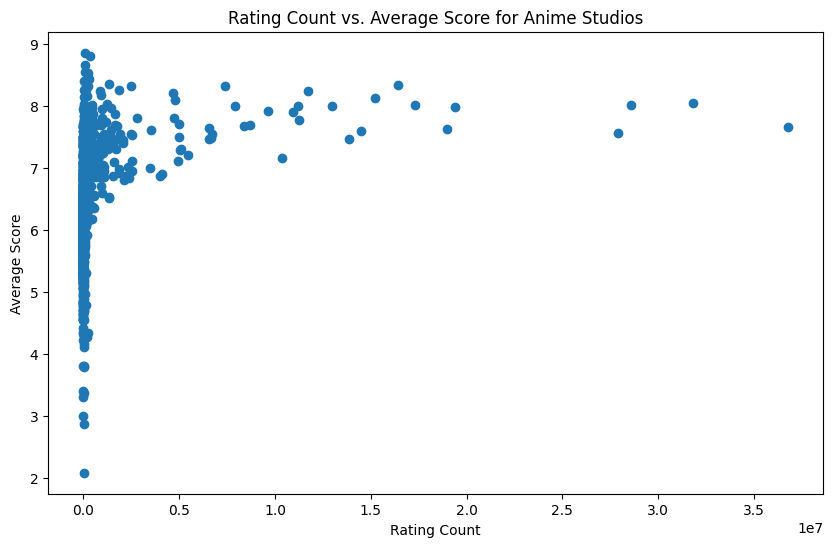

In [134]:
plt.figure(figsize=(10, 6))

plt.scatter(hr_studio_data['Rating Count'], hr_studio_data['Average Score'])
plt.xlabel("Rating Count")
plt.ylabel("Average Score")
plt.title('Rating Count vs. Average Score for Anime Studios')
plt.show()

Let's try logging the x-axis to get better visualizations!

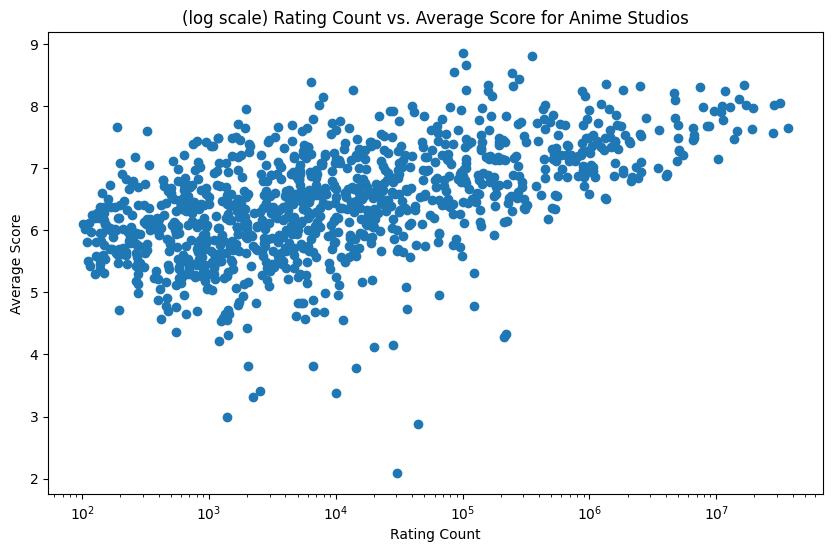

In [192]:
plt.figure(figsize=(10, 6))

plt.scatter(hr_studio_data['Rating Count'], hr_studio_data['Average Score'])
plt.xlabel("Rating Count")
plt.ylabel("Average Score")
plt.xscale('log')
plt.title('(log scale) Rating Count vs. Average Score for Anime Studios')
plt.show()

There is a clear positive logarithmic correlation between the rating count and average score! As an anime studio gets more well-known, it's reception to audience also increases!

0.5473124156143874
0.2994912539014758


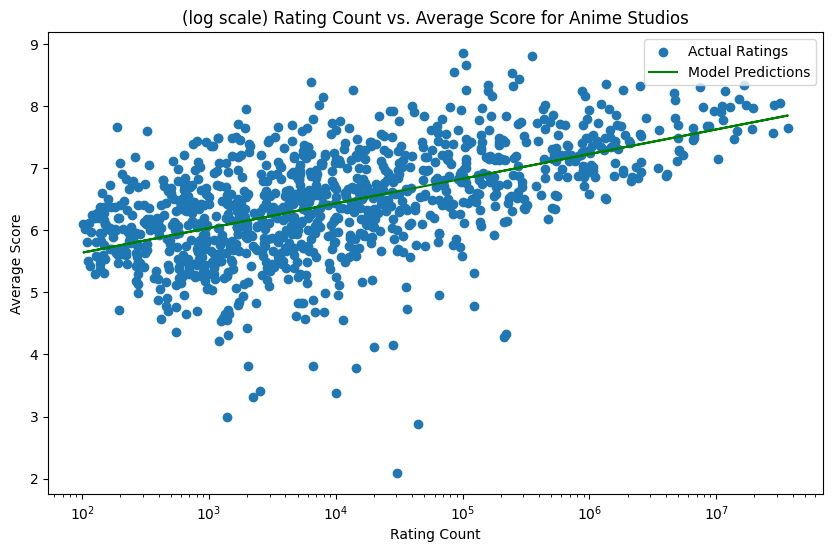

In [ ]:
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import SGDRegressor

print(np.log(hr_studio_data["Rating Count"]).corr(hr_studio_data['Average Score']))

scaler = StandardScaler()
rating_count_ln = scaler.fit_transform(np.array(np.log(hr_studio_data["Rating Count"])).reshape(-1,1))

model = SGDRegressor()
model.fit(rating_count_ln, hr_studio_data['Average Score'])
predicted_ratings = model.predict(rating_count_ln)
print(model.score(rating_count_ln, hr_studio_data['Average Score']))

plt.figure(figsize=(10, 6))
plt.scatter(hr_studio_data['Rating Count'], hr_studio_data['Average Score'], label="Actual Ratings")
plt.plot(hr_studio_data['Rating Count'], predicted_ratings, color='green', marker=None, label=f'Model Predictions')
plt.xlabel("Rating Count")
plt.ylabel("Average Score")
plt.xscale('log')
plt.title('(log scale) Rating Count vs. Average Score for Anime Studios')
plt.legend()
plt.show()

### What are the most popular themes?

In [155]:
theme_data = anime_data.explode("themes")[["members", "themes"]]
theme_data = theme_data.dropna()
theme_data = theme_data.groupby("themes")["members"].sum()
theme_data_dict = theme_data.to_dict()
theme_data_dict

{'Adult Cast': 90036365,
 'Anthropomorphic': 14260468,
 'CGDCT': 20042235,
 'Childcare': 12267355,
 'Combat Sports': 4765559,
 'Crossdressing': 4051741,
 'Delinquents': 7764820,
 'Detective': 20382125,
 'Educational': 1681365,
 'Gag Humor': 28066627,
 'Gore': 81232886,
 'Harem': 83527445,
 'High Stakes Game': 15821464,
 'Historical': 61058616,
 'Idols (Female)': 5436422,
 'Idols (Male)': 1421682,
 'Isekai': 76283952,
 'Iyashikei': 15571137,
 'Love Polygon': 36709975,
 'Love Status Quo': 7941337,
 'Magical Sex Shift': 2112151,
 'Mahou Shoujo': 11358314,
 'Martial Arts': 26117486,
 'Mecha': 43000808,
 'Medical': 4941568,
 'Military': 68265665,
 'Music': 29056800,
 'Mythology': 49968537,
 'Organized Crime': 20250198,
 'Otaku Culture': 24104500,
 'Parody': 37349418,
 'Performing Arts': 4345576,
 'Pets': 1501706,
 'Psychological': 92481792,
 'Racing': 5050889,
 'Reincarnation': 27393285,
 'Reverse Harem': 6696378,
 'Samurai': 15567726,
 'School': 298471883,
 'Showbiz': 5517419,
 'Space': 15

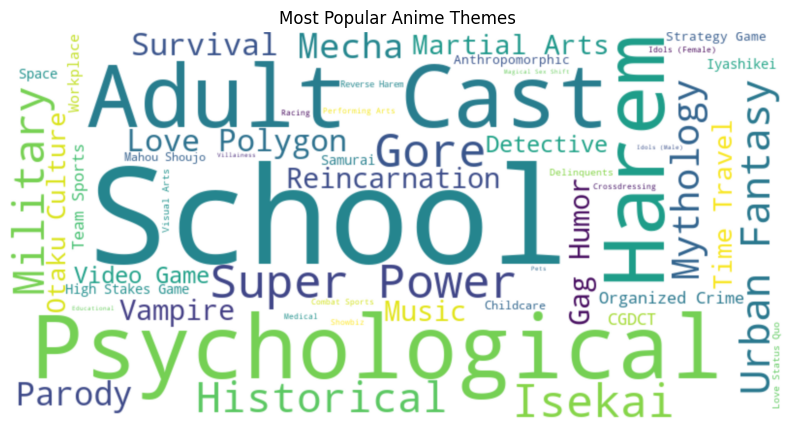

In [164]:
from wordcloud import WordCloud

# Generate word cloud
wordcloud = WordCloud(width=800, height=400, background_color="white").generate_from_frequencies(theme_data_dict)

# Display word cloud
plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation='bicubic')
plt.axis("off")
plt.title("Most Popular Anime Themes")
plt.show()


### Hidden gems in Anime in each Genre

find the top 5 highest rated anime for each genre, that are below a certain scored_by threshold...

In [280]:
genre_raw_data = anime_data.explode("genres")[["title", "score", "scored_by", "members", "genres", "episodes"]]
genre_data = genre_raw_data.dropna()
genre_data["weight"] = genre_data["score"] * genre_data["scored_by"]
genre_data = genre_data.groupby("genres")[["scored_by", "weight", "members"]].sum().reset_index()
genre_data["avg score"] = genre_data["weight"]/genre_data["scored_by"]
genre_data = genre_data.sort_values(by="avg score", ascending=False)
genre_data[["genres", "avg score"]]
most_watched = genre_data.sort_values(by="members", ascending=False)
combine1 = pd.DataFrame({
    'genres': genre_data["genres"].tolist(),
    'avg rating': genre_data["avg score"].tolist()
})
combine2 = pd.DataFrame({
    'genres': most_watched["genres"].tolist(),
    'members': most_watched["members"].tolist()
})
compare = pd.DataFrame({
    'Highest Rated Genres': combine1["genres"],
    'Avg Rating': combine1["avg rating"],
    'Most Popular Genres': combine2["genres"],
    'Members (Popularity)': combine2["members"]
})
compare

C:\Users\mural\AppData\Local\Temp\ipykernel_16700\2295873071.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  genre_data["weight"] = genre_data["score"] * genre_data["scored_by"]


,Highest Rated Genres,Avg Rating,Most Popular Genres,Members (Popularity)
0,Award Winning,8.358417,Action,501932540
1,Drama,7.945908,Comedy,339018420
2,Suspense,7.921393,Fantasy,325523527
3,Sports,7.905971,Drama,261082353
4,Avant Garde,7.808484,Romance,258115483
5,Supernatural,7.781902,Adventure,229544651
6,Mystery,7.723640,Supernatural,160592046
7,Adventure,7.694731,Sci-Fi,158686619
8,Action,7.679177,Suspense,122483466
9,Gourmet,7.671871,Mystery,109728220


In [285]:
genres = ["Award Winning", "Avant Garde", "Sports", "Adventure"]
genre_raw_data = genre_raw_data[genre_raw_data["episodes"] > 1.0] # no movies!
for genre in genres:
    overlooked_genre_data = genre_raw_data[genre_raw_data["genres"] == genre]
    overlooked_genre_data = overlooked_genre_data.sort_values(by="score", ascending=False)
    print(f"Top 5 underrated {genre} Anime")
    print(overlooked_genre_data[["title", "score", "members"]][overlooked_genre_data["members"] < 5e5].head()) # less than 500k added to list

Top 5 underrated Award Winning Anime
                                       title  score  members
19225                               Odd Taxi   8.65   469337
8574                 Ping Pong the Animation   8.62   413648
5141                  Yojouhan Shinwa Taikei   8.55   470824
438    Koukaku Kidoutai: Stand Alone Complex   8.42   409764
9354                               Shirobako   8.27   457763
Top 5 underrated Avant Garde Anime
                   title  score  members
3220               Kaiba   8.14   159186
6325  Mawaru Penguindrum   7.93   308276
4728     Kuuchuu Buranko   7.90    97699
16            Texhnolyze   7.76   267703
299      Mousou Dairinin   7.66   443598
Top 5 underrated Sports Anime
                               title  score  members
2659                 Ashita no Joe 2   8.74    57458
4040  Hajime no Ippo: New Challenger   8.67   304481
8574         Ping Pong the Animation   8.62   413648
8092          Hajime no Ippo: Rising   8.61   277210
148                  

### Anime Score Prediction Model (MACHINE LEARNING)

Anime Score Prediction
Objective: Predict the score an anime will receive based on its attributes.

Approach:

Features: Use attributes like genres, demographics, duration, episodes, and year, themes, studio

Model: Train a regression model (e.g., Linear Regression, Random Forest, Gradient Boosting).

In [320]:
anime_data

,mal_id,title,year,score,scored_by,rating,duration,members,episodes,studios,themes,genres,demographics,age_rating,weight
0,1,Cowboy Bebop,1998.0,8.75,1008605.0,R - 17+ (violence & profanity),24 min per ep,1951997,26.0,[Sunrise],"[Adult Cast, Space]","[Action, Award Winning, Sci-Fi]",[],17.0,8825293.75
1,5,Cowboy Bebop: Tengoku no Tobira,NaN,8.38,223452.0,R - 17+ (violence & profanity),1 hr 55 min,393960,1.0,[Bones],"[Adult Cast, Space]","[Action, Sci-Fi]",[],17.0,1872527.76
2,6,Trigun,1998.0,8.22,386030.0,PG-13 - Teens 13 or older,24 min per ep,795600,26.0,[Madhouse],[Adult Cast],"[Action, Adventure, Sci-Fi]",[Shounen],13.0,3173166.60
3,7,Witch Hunter Robin,2002.0,7.24,45117.0,PG-13 - Teens 13 or older,25 min per ep,122044,26.0,[Sunrise],[Detective],"[Action, Drama, Mystery, Supernatural]",[],13.0,326647.08
4,8,Bouken Ou Beet,2004.0,6.92,6938.0,PG - Children,23 min per ep,16185,52.0,[Toei Animation],[],"[Action, Adventure, Fantasy]",[Shounen],8.0,48010.96
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28343,61274,Ginga Tokkyuu Milky☆Subway,2025.0,NaN,NaN,G - All Ages,Unknown,0,NaN,[],[Space],"[Comedy, Sci-Fi]",[],0.0,NaN
28344,61276,Mikata ga Yowasugite Hojo Mahou ni Tesshiteita...,2025.0,NaN,NaN,None,Unknown,1,NaN,[Gekkou],[],"[Action, Adventure, Fantasy]",[],NaN,NaN
28345,61278,Sumikko Gurashi Movie 4,NaN,NaN,NaN,G - All Ages,Unknown,0,1.0,[Fanworks],[],[Comedy],[],0.0,NaN
28346,61280,Kore Kaite Shine,NaN,NaN,NaN,None,Unknown,1,NaN,[],[Otaku Culture],[Comedy],[],NaN,NaN


### Anime Age Rating vs Duration: Do younger audiences prefer shorter episodes?

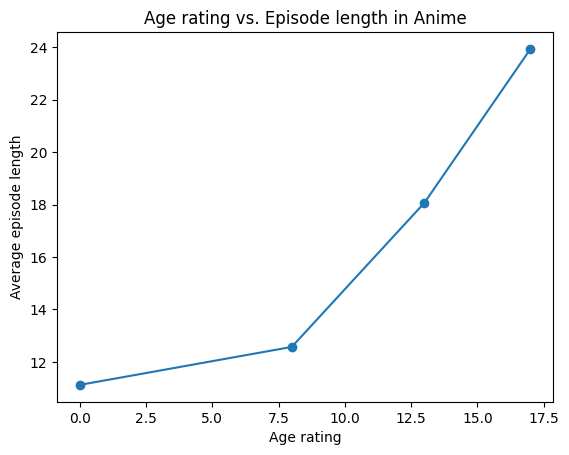

In [303]:
rating_to_age = {
    'R - 17+ (violence & profanity)': 17,
    'PG-13 - Teens 13 or older': 13,
    'PG - Children': 8,
    'R+ - Mild Nudity': 17,
    'G - All Ages': 0,
    'Rx - Hentai': None,
    None: None
}
def getDuration(str):
    str_list = str.split()
    n = len(str_list) - 2 # ignore "per ep"
    index = 1
    minutes = 0
    if str_list[index] == "hr":
        minutes += int(str_list[index - 1]) * 60
        index += 2
    if index < n and str_list[index] == "min":
        minutes += int(str_list[index - 1])
        index += 2
    if index < n and str_list[index] == "sec":
        minutes += int(str_list[index - 1]) / 60
    return minutes

anime_data['age_rating'] = anime_data['rating'].map(rating_to_age)
age_data = anime_data.dropna(subset=['age_rating'])
age_data = age_data[age_data["episodes"] > 1.0] # no movies!
age_data = age_data[age_data["duration"] != 'Unknown']
age_data['duration_minutes'] = age_data['duration'].map(getDuration)
age_data = age_data.groupby("age_rating")["duration_minutes"].mean()

plt.plot(age_data.index, age_data.values, marker='o')
plt.xlabel("Age rating")
plt.ylabel("Average episode length")
plt.title("Age rating vs. Episode length in Anime")
plt.show()

### Year vs Rating: what is the golden age of anime?

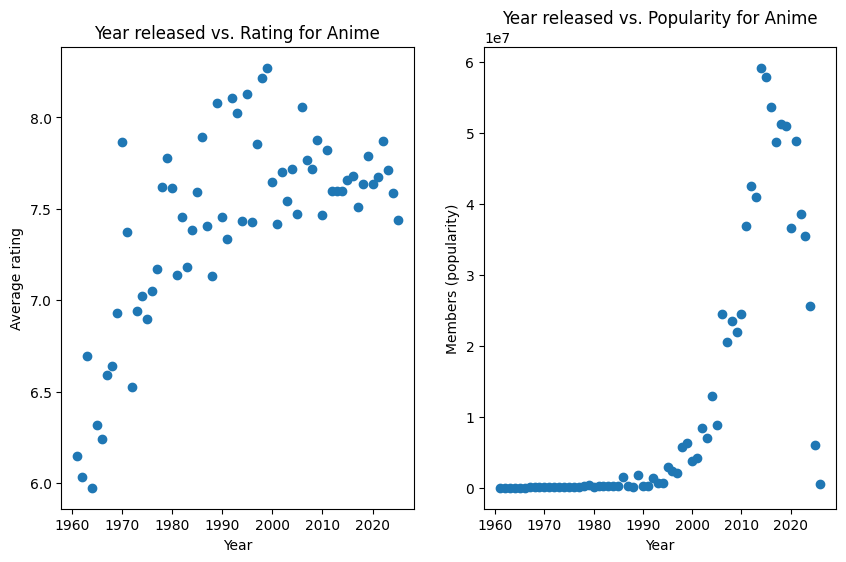

In [316]:
anime_data["weight"] = anime_data["score"] * anime_data["scored_by"]
year_data = anime_data.groupby("year")[["weight", "scored_by", "members"]].sum().reset_index()
year_data["avg score"] = year_data["weight"] / year_data["scored_by"]

fig, axes = plt.subplots(1, 2, figsize=(10, 6))
axes[0].scatter(year_data["year"], year_data["avg score"])
axes[0].set_xlabel("Year")
axes[0].set_ylabel("Average rating")
axes[0].set_title("Year released vs. Rating for Anime")

axes[1].scatter(year_data["year"], year_data["members"])
axes[1].set_xlabel("Year")
axes[1].set_ylabel("Members (popularity)")
axes[1].set_title("Year released vs. Popularity for Anime")
plt.show()

### Further

In [319]:
demo_data = anime_data.explode("demographics")
demo_data["demographics"].unique()

array([nan, 'Shounen', 'Josei', 'Seinen', 'Shoujo', 'Kids'], dtype=object)

In [321]:
anime_data

,mal_id,title,year,score,scored_by,rating,duration,members,episodes,studios,themes,genres,demographics,age_rating,weight
0,1,Cowboy Bebop,1998.0,8.75,1008605.0,R - 17+ (violence & profanity),24 min per ep,1951997,26.0,[Sunrise],"[Adult Cast, Space]","[Action, Award Winning, Sci-Fi]",[],17.0,8825293.75
1,5,Cowboy Bebop: Tengoku no Tobira,NaN,8.38,223452.0,R - 17+ (violence & profanity),1 hr 55 min,393960,1.0,[Bones],"[Adult Cast, Space]","[Action, Sci-Fi]",[],17.0,1872527.76
2,6,Trigun,1998.0,8.22,386030.0,PG-13 - Teens 13 or older,24 min per ep,795600,26.0,[Madhouse],[Adult Cast],"[Action, Adventure, Sci-Fi]",[Shounen],13.0,3173166.60
3,7,Witch Hunter Robin,2002.0,7.24,45117.0,PG-13 - Teens 13 or older,25 min per ep,122044,26.0,[Sunrise],[Detective],"[Action, Drama, Mystery, Supernatural]",[],13.0,326647.08
4,8,Bouken Ou Beet,2004.0,6.92,6938.0,PG - Children,23 min per ep,16185,52.0,[Toei Animation],[],"[Action, Adventure, Fantasy]",[Shounen],8.0,48010.96
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28343,61274,Ginga Tokkyuu Milky☆Subway,2025.0,NaN,NaN,G - All Ages,Unknown,0,NaN,[],[Space],"[Comedy, Sci-Fi]",[],0.0,NaN
28344,61276,Mikata ga Yowasugite Hojo Mahou ni Tesshiteita...,2025.0,NaN,NaN,None,Unknown,1,NaN,[Gekkou],[],"[Action, Adventure, Fantasy]",[],NaN,NaN
28345,61278,Sumikko Gurashi Movie 4,NaN,NaN,NaN,G - All Ages,Unknown,0,1.0,[Fanworks],[],[Comedy],[],0.0,NaN
28346,61280,Kore Kaite Shine,NaN,NaN,NaN,None,Unknown,1,NaN,[],[Otaku Culture],[Comedy],[],NaN,NaN
